https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('hanoi_quality.csv')
df1=df.reset_index()['pm25']

In [3]:
df1.shape

(1920,)

In [4]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
print(train_size)
print(test_size)

1344
576


In [7]:
print(train_data.shape)
print(test_data.shape)


(1344, 1)
(576, 1)


In [8]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [9]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(ytest.shape)


(1243, 100)
(1243,)
(475, 100)
(475,)


In [11]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [12]:
print(X_train.shape)
print(X_test.shape)

(1243, 100, 1)
(475, 100, 1)


In [13]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

D:\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - loss: 0.0602 - val_loss: 0.0272
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0248 - val_loss: 0.0242
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0197 - val_loss: 0.0227
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0178 - val_loss: 0.0219
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0162 - val_loss: 0.0236
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0168 - val_loss: 0.0205
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0160 - val_loss: 0.0198
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0142 - val_loss: 0.0193
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0149 - val_loss: 0.0214
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0140 - val_loss: 0.0191
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0136 - val_loss: 0.0192
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/st

In [15]:
# 10. Dự báo dữ liệu test,
train_predict=model.predict(X_train)
y_pred=model.predict(test_data.reshape(test_data.shape[0],test_data.shape[1] , 1))


39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [16]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)


In [17]:
ytest=scaler.inverse_transform(test_data)
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(ytest - y_pred)/np.abs(ytest))*100

print('Testing MAPE:', test_mape)

# Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

Testing RMSE: 16.408377898439475
Testing MAPE: 15.429396051363536
Testing MAE: 12.62970427175363


In [18]:
x_input=test_data[60:].reshape(1,-1)
x_input.shape

(1, 516)

In [19]:
# 13. Dự báo 30 ngày tiếp theo
x_input=test_data[60:].reshape(1,-1)
print(x_input.shape)

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=516
i=0
while(i<30):

    if(len(temp_input)>516):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


(1, 516)
[0.3782426]
517
1 day input [0.79534884 0.70232558 0.44186047 0.62790698 0.90697674 0.89767442
 0.81860465 0.67906977 0.44651163 0.49302326 0.62325581 0.48837209
 0.22325581 0.46511628 0.49302326 0.73488372 0.81395349 0.90697674
 0.95348837 0.69302326 0.30697674 0.51162791 0.65581395 0.58139535
 0.48837209 0.68837209 0.86046512 0.71162791 0.62325581 0.48837209
 0.37674419 0.35348837 0.54883721 0.47906977 0.3255814  0.55348837
 0.25581395 0.25581395 0.23255814 0.30697674 0.4        0.32093023
 0.45581395 0.59534884 0.82325581 0.59069767 0.66511628 0.55348837
 0.68372093 0.45116279 0.45116279 0.20930233 0.31627907 0.5627907
 0.73023256 0.69302326 0.5627907  0.84186047 0.79069767 0.58604651
 0.76744186 0.65581395 0.44651163 0.4        0.67906977 0.60930233
 0.4744186  0.55813953 0.30232558 0.53953488 0.62325581 0.34418605
 0.29302326 0.28837209 0.26976744 0.29767442 0.39534884 0.60465116
 0.53488372 0.54883721 0.40930233 0.25116279 0.24186047 0.30232558
 0.31162791 0.35813953 0.6

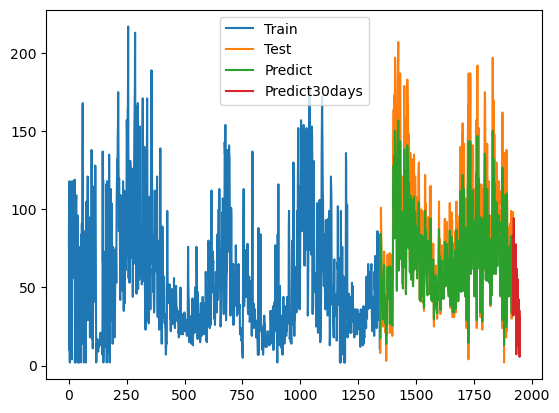

In [20]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,y_pred)

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

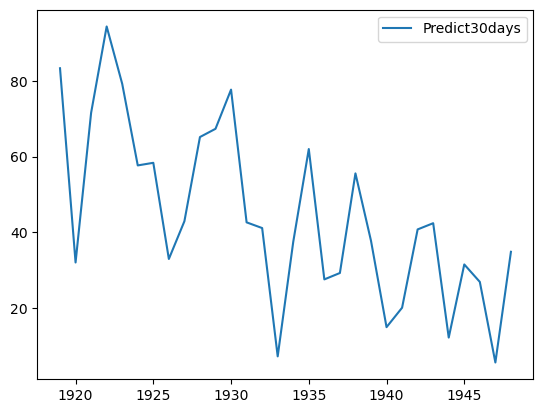

In [21]:
# 14.Vẽ hình
# Dự đoán 30 ngày tiếp theo
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Predict30days'])
plt.show()

In [22]:
print(scaler.inverse_transform(lst_output))

[[83.32216156]
 [32.00250682]
 [71.54725385]
 [94.35848963]
 [79.20346585]
 [57.65168172]
 [58.33836702]
 [32.9329398 ]
 [42.90586007]
 [65.14992964]
 [67.32216161]
 [77.67702651]
 [42.60841754]
 [41.10234764]
 [ 7.203708  ]
 [37.45709565]
 [61.97484714]
 [27.53693794]
 [29.22766876]
 [55.54681179]
 [37.74793845]
 [14.91705728]
 [20.0520913 ]
 [40.74056742]
 [42.38422555]
 [12.15950264]
 [31.48720291]
 [26.87429358]
 [ 5.58644316]
 [34.83053353]]
